In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset=pd.read_csv("SMSSpamCollection",sep='\t',names=['label','message'])

In [4]:
dataset

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
dataset.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
dataset['label']=dataset['label'].map({'ham':0,'spam':1})

In [8]:
dataset

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

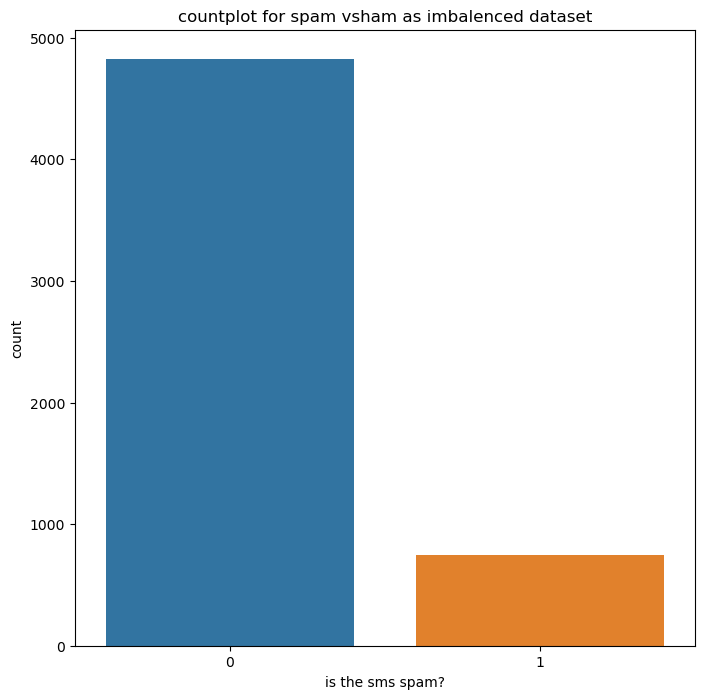

In [10]:
plt.figure(figsize=(8,8))
g=sns.countplot(x="label",data=dataset)
p=plt.title('countplot for spam vsham as imbalenced dataset')
p=plt.xlabel('is the sms spam?')
p=plt.ylabel('count')

In [11]:
only_spam=dataset[dataset["label"]==1]

In [12]:
only_spam

,label,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [13]:
print('the number of spam sms:',len(only_spam))
print('no. of ham sms:',len(dataset)-len(only_spam))

the number of spam sms: 747
no. of ham sms: 4825


In [14]:
count=int((dataset.shape[0]-only_spam.shape[0])/only_spam.shape[0])

In [15]:
count

6

In [16]:
for i in range(0,count-1):
    dataset=pd.concat([dataset,only_spam])
dataset.shape

(9307, 2)

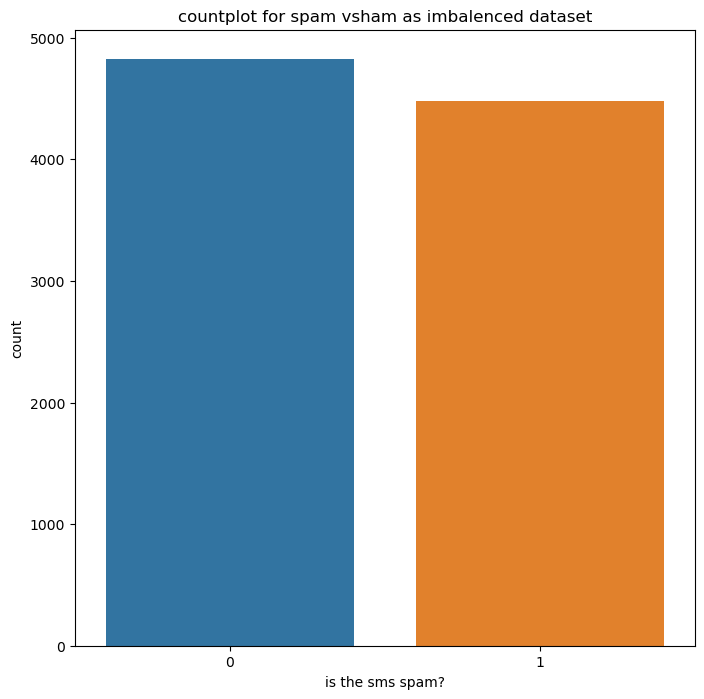

In [17]:
plt.figure(figsize=(8,8))
g=sns.countplot(x="label",data=dataset)
p=plt.title('countplot for spam vsham as imbalenced dataset')
p=plt.xlabel('is the sms spam?')
p=plt.ylabel('count')

In [18]:
dataset['word_count']=dataset['message'].apply(lambda x: len(x.split()))

In [19]:
dataset

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


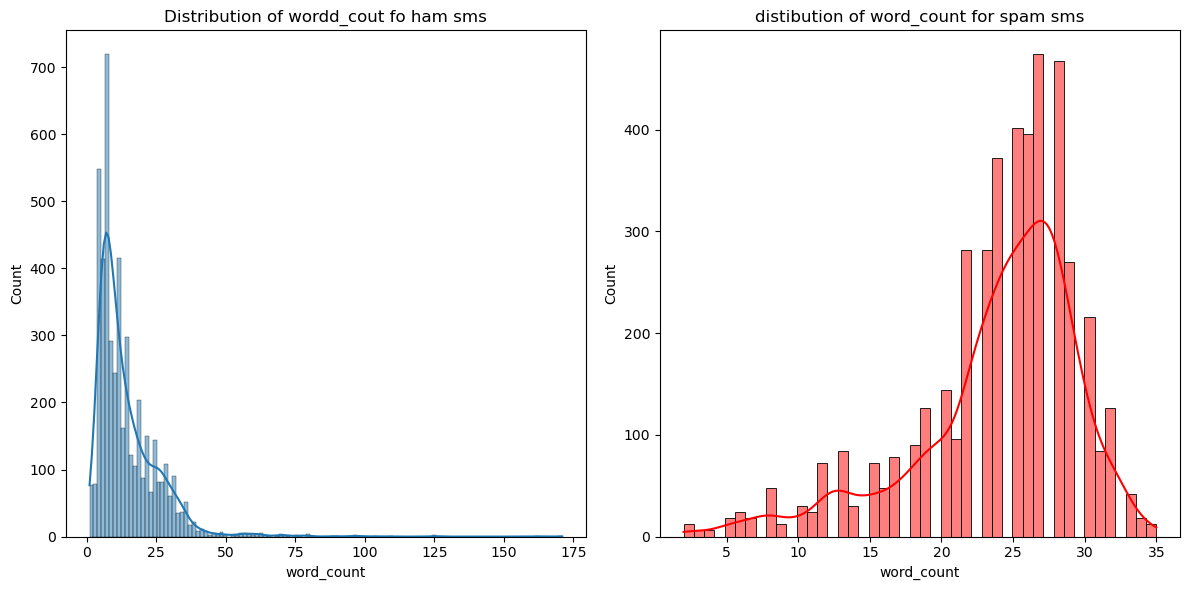

In [20]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
g=sns.histplot(dataset[dataset["label"]==0].word_count,kde=True)
p=plt.title('Distribution of wordd_cout fo ham sms')
plt.subplot(1,2,2)
g=sns.histplot(dataset[dataset["label"]==1].word_count,color="red",kde=True)
p=plt.title('distibution of word_count for spam sms')
plt.tight_layout()
plt.show()

In [21]:
#creating new features current symbols
def currency(data):
    currency_symbols=['$','€','¥','₣','₹']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0
    

In [22]:
dataset["constrais_currencyy_symbols"]=dataset["message"].apply(currency)

In [23]:
dataset

,label,message,word_count,constrais_currencyy_symbols
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,0
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


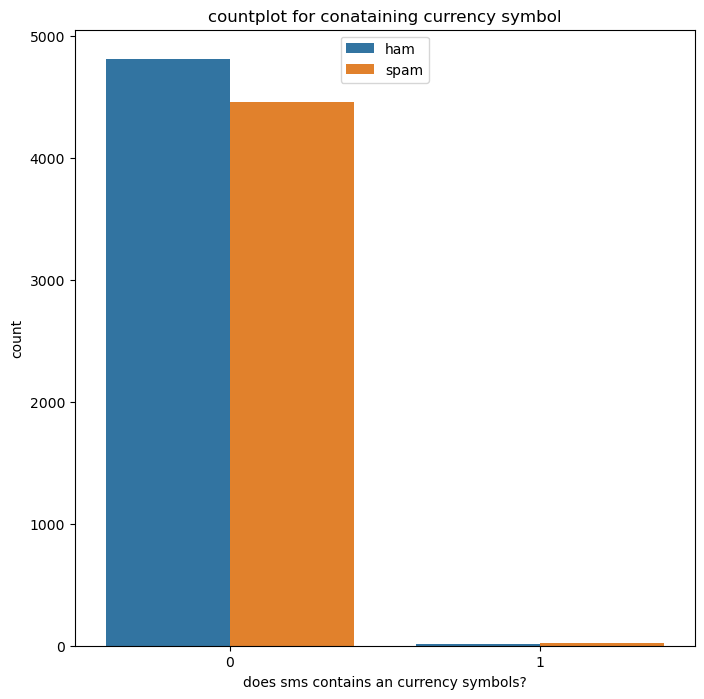

In [24]:
plt.figure(figsize=(8,8))
g=sns.countplot(x='constrais_currencyy_symbols',data=dataset,hue="label")
p=plt.title('countplot for conataining currency symbol' )
p=plt.xlabel('does sms contains an currency symbols?')
p=plt.ylabel('count')
p=plt.legend(labels=["ham","spam"],loc=9)

In [25]:
def number(data):
    for i in data:
        if ord(i)>=48 and ord(i)<=57:
            return 1
    return 0


In [26]:
dataset["contains_number"]=dataset["message"].apply(number)

In [27]:
dataset

,label,message,word_count,constrais_currencyy_symbols,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,0,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


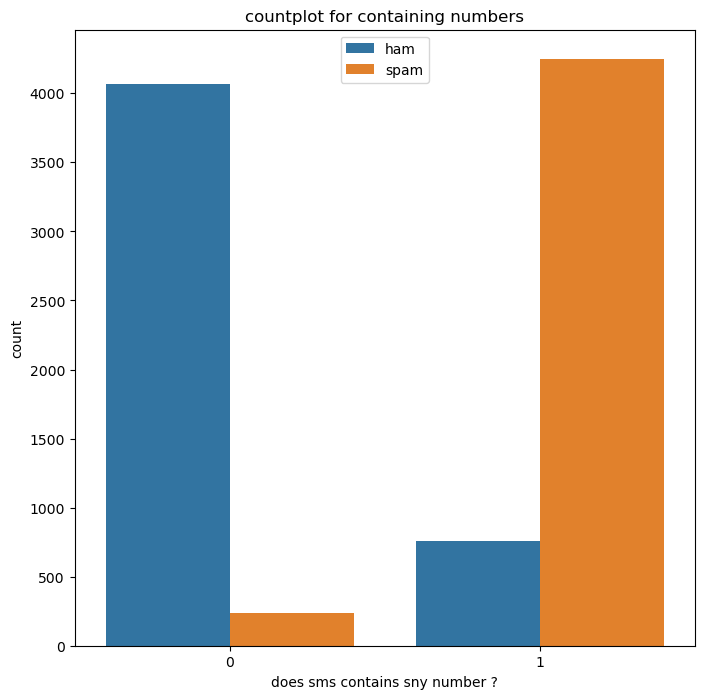

In [28]:
plt.figure(figsize=(8,8))
g=sns.countplot(x='contains_number',data=dataset,hue="label")
p=plt.title('countplot for containing numbers')
p=plt.xlabel('does sms contains sny number ?')
p=plt.ylabel('count')
p=plt.legend(labels=["ham","spam"],loc=9)

In [29]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prane\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
import nltk
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\prane\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [31]:
corpus=[]
wnl=WordNetLemmatizer()
for sms in list(dataset.message):
    message=re.sub(pattern='{^a-zA-Z}',repl=' ',string=sms)
    message=message.lower()
    words=message.split()
    filtered_words=[word for word in words if word not in set(stopwords.words("english"))]
    lemn_words=[wnl.lemmatize(word) for word in filtered_words]
    message=' '.join(lemn_words)
    corpus.append(message)

In [32]:
corpus

['go jurong point, crazy.. available bugis n great world la e buffet... cine got amore wat...',
 'ok lar... joking wif u oni...',
 "free entry 2 wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question(std txt rate)t&c's apply 08452810075over18's",
 'u dun say early hor... u c already say...',
 'nah think go usf, life around though',
 "freemsg hey darling 3 week's word back! i'd like fun still? tb ok! xxx std chgs send, £1.50 rcv",
 'even brother like speak me. treat like aid patent.',
 "per request 'melle melle (oru minnaminunginte nurungu vettam)' set callertune callers. press *9 copy friend callertune",
 'winner!! valued network customer selected receivea £900 prize reward! claim call 09061701461. claim code kl341. valid 12 hour only.',
 'mobile 11 month more? u r entitled update latest colour mobile camera free! call mobile update co free 08002986030',
 "i'm gonna home soon want talk stuff anymore tonight, k? i've cried enough today.",
 'six chance win ca

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=500)
vectors=tfidf.fit_transform(corpus).toarray()
feature_names= tfidf.get_feature_names_out()

In [34]:
x=pd.DataFrame(vectors,columns=feature_names)
y=dataset['label']

In [35]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
x_train

,00,000,02,03,04,06,0800,08000839402,08000930705,0870,...,xxx,ya,yeah,year,yes,yet,yo,you,yours,yr
3533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.346636,0.0,0.0,0.0,0.0,0.0,0.0
6976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.275085,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
cv=cross_val_score(mnb,x,y,scoring='f1',cv=10)
print(cv)
print(cv.std)
print(round(cv.mean(),3))
print(round(cv.std(),3))

[0.94456763 0.95111111 0.94606742 0.9579646  0.95819209 0.95515695
 0.94573643 0.9452514  0.95049505 0.95067265]
<built-in method std of numpy.ndarray object at 0x0000023A4F0484B0>
0.951
0.005


In [39]:
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_test)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       959
           1       0.96      0.95      0.95       903

    accuracy                           0.96      1862
   macro avg       0.96      0.96      0.96      1862
weighted avg       0.96      0.96      0.96      1862



In [41]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[921,  38],
       [ 45, 858]], dtype=int64)

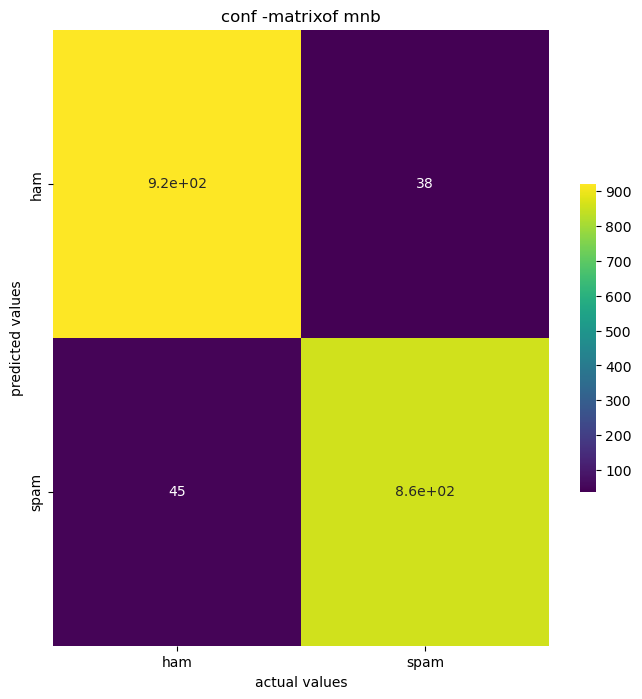

In [42]:
plt.figure(figsize=(8,8))
axis_labels=['ham','spam']
g=sns.heatmap(data=cm,xticklabels=axis_labels,yticklabels=axis_labels,annot=True,cbar_kws={"shrink":0.5},cmap="viridis")
p=plt.title("conf -matrixof mnb")
p=plt.xlabel('actual values')
p=plt.ylabel('predicted values')

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
cv1=cross_val_score(dt,x,y,scoring='f1',cv=10)
print(round(cv1.mean(),3))
print(round(cv1.std(),3))

0.98
0.003


In [44]:
dt.fit(x_train,y_train)
y_pred1=dt.predict(x_test)

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       959
           1       0.96      0.95      0.95       903

    accuracy                           0.96      1862
   macro avg       0.96      0.96      0.96      1862
weighted avg       0.96      0.96      0.96      1862



In [46]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[921,  38],
       [ 45, 858]], dtype=int64)

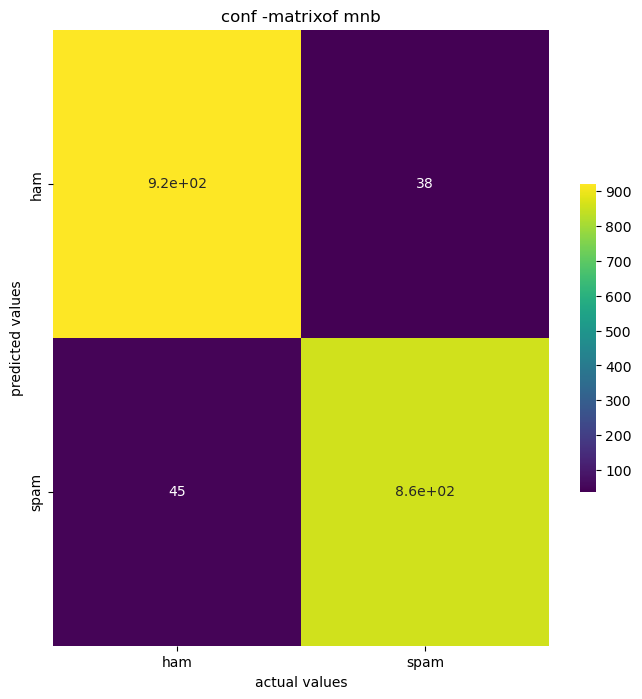

In [47]:
plt.figure(figsize=(8,8))
axis_labels=['ham','spam']
g=sns.heatmap(data=cm,xticklabels=axis_labels,yticklabels=axis_labels,annot=True,cbar_kws={"shrink":0.5},cmap="viridis")
p=plt.title("conf -matrixof mnb")
p=plt.xlabel('actual values')
p=plt.ylabel('predicted values')

In [48]:
def predict_spam(sms):
    message=re.sub(pattern='{^a-zA-Z}',repl=' ',string=sms)
    message=message.lower()
    words=message.split()
    filtered_words=[word for word in words if word not in set(stopwords.words("english"))]
    lemn_words=[wnl.lemmatize(word) for word in filtered_words]
    message=' '.join(lemn_words)
    temp=tfidf.transform([message]).toarray()
    return dt.predict(temp)

In [51]:
sample_message='Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&Cs apply 8452810075 over18s'


if predict_spam(sample_message):
    print('gotcha: this is a spam message.')
else:
    print('this is a ham(noormal) message.')

gotcha: this is a spam message.


C:\Users\prane\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
